In [2]:
%matplotlib inline
%run ../gsc2
%run ../grammar

##Example 2: Spoken word recognition

In [3]:
# Grammar 2 (spoken word recognition)
# W[1] -> A B  (beaker)
# W[2] -> A C  (beetle)
# W[3] -> D B  (speaker)
# W[4] -> E F  (carousal)
# To make the model minimal, we ignore the root symbol and the null filler symbol.

role_names2 = ['R[0,1,2]', 'R[0,1]', 'R[1,2]']
filler_names2 = ['W[1]', 'W[2]', 'W[3]', 'W[4]', 'A', 'B', 'C', 'D', 'E', 'F']
#filler_names2 = ['W[1]', 'W[2]', 'W[3]', 'W[4]', 'A', 'B', 'C', 'D']
sentence_types2 = [['W[1]/R[0,1,2]', 'A/R[0,1]', 'B/R[1,2]'], 
                   ['W[2]/R[0,1,2]', 'A/R[0,1]', 'C/R[1,2]'],
                   ['W[3]/R[0,1,2]', 'D/R[0,1]', 'B/R[1,2]'],
                   ['W[4]/R[0,1,2]', 'E/R[0,1]', 'F/R[1,2]']]
#                   ['W[4]/R[0,1,2]', 'D/R[0,1]', 'C/R[1,2]']]  # for balance

net2 = GscNet(filler_names=filler_names2, role_names=role_names2, reptype_f='dist', reptype_r='dist',
             T_init=0.01, T_decay_rate=0, q_init=0, q_max=200, q_rate=0.01, q_fun='plinear', 
             beta=10, grid_points=sentence_types2)

net2.set_weight('W[1]/R[0,1,2]', ['A/R[0,1]', 'B/R[1,2]'], 2.0) # W1/012 -> A/01 B/12
net2.set_weight('W[2]/R[0,1,2]', ['A/R[0,1]', 'C/R[1,2]'], 2.0) # W2/012 -> A/01 C/12
net2.set_weight('W[3]/R[0,1,2]', ['D/R[0,1]', 'B/R[1,2]'], 2.0) # W3/012 -> D/01 B/12
net2.set_weight('W[4]/R[0,1,2]', ['E/R[0,1]', 'F/R[1,2]'], 2.0) # W4/012 -> E/01 F/12
#net2.set_weight('W[4]/R[0,1,2]', ['D/R[0,1]', 'C/R[1,2]'], 2.0) # W4/012 -> E/01 F/12
net2.set_filler_bias(['W[1]', 'W[2]', 'W[3]', 'W[4]'], -2.0)    # W1~W4: need two daughters
net2.set_filler_bias(['A', 'B', 'C', 'D', 'E', 'F'], -1.0)      # A~F: need a mother
#net2.set_filler_bias(['A', 'B', 'C', 'D'], -1.0)      # A~F: need a mother
net2.check_beta(disp=True)

Recommended beta min = 5.391


In [4]:
init_state = copy.deepcopy(net2.zeta)   # The bowl center in neural coordinates
#net2.reset()
#net2.T = 0.
#net2.run(10000, plot=True, update_T=False, update_q=False) # In this way, 
#net2.read_state()
#init_state = copy.deepcopy(net2.act)

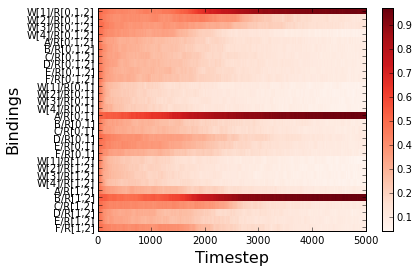

      R[0,1,2]    R[0,1]    R[1,2]
W[1]  0.680110  0.132822  0.138200
W[2]  0.433897  0.131864  0.130456
W[3]  0.325543  0.135792  0.129669
W[4]  0.210912  0.127382  0.146636
A     0.193579  0.816680  0.205851
B     0.199245  0.207040  0.757427
C     0.184637  0.197060  0.377702
D     0.191011  0.294651  0.221406
E     0.189172  0.263287  0.206670
F     0.202317  0.209870  0.279746
['W[1]/R[0,1,2]', 'A/R[0,1]', 'B/R[1,2]']
      R[0,1,2]    R[0,1]    R[1,2]
W[1]  0.958052  0.061416  0.058309
W[2]  0.119934  0.063364  0.065626
W[3]  0.121456  0.049999  0.053922
W[4]  0.061953  0.063937  0.054879
A     0.084248  0.962637  0.089404
B     0.080594  0.078881  0.966036
C     0.083815  0.084522  0.100514
D     0.084277  0.100529  0.096263
E     0.081234  0.092193  0.089884
F     0.090120  0.086231  0.089789
['W[1]/R[0,1,2]', 'A/R[0,1]', 'B/R[1,2]']


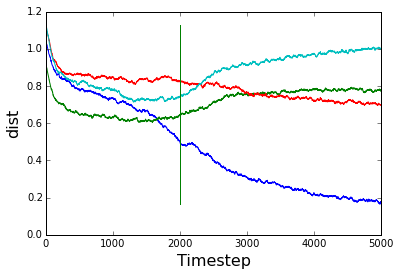

In [5]:
params2 = {'testvar': 'ema_speed',
           'norm_ord': np.inf,
           'convergence_check': True,
           'dist_space': 'S',
           'tol': 1e-3,
           'ema_factor': 0.1, 
           'grid_points': sentence_types2, 
           'input_method': 'ext',
           'cumulative_input': False,
           'input_inhib': False,
           'update_T': True, 
           'update_q': True, 
           'maxstep': np.array([2000, 3000]), 
           'nrep': 1,
           'q_fun': 'plinear', 
           'ext_overlap': True,
           'ext_overlap_steps': 500, 
           'init_state': init_state}

net2.reset()
net2.T_init = 0.001
net2.T_decay_rate = 0.0

input_list = ['A/R[0,1]', 'B/R[1,2]']
net2.reset()
sim2 = sim(net2, params2)
input_vals = [1.0, 1.0]
# input_vals = [1.0, 4.0]     # CHECK
sim2.input_list = input_list
sim2.input_vals = input_vals

sim2.simulate()
rep_num = 1
sim2.plot_act_trace(rep_num)
sim2.read_state(rep_num, 1)
sim2.read_grid_point(rep_num, 1)
sim2.read_state(rep_num, 2)
sim2.read_grid_point(rep_num, 2)
sim2.rt
sim2.plot_trace('dist', rep_num)

In [6]:
# There is no single word unit in this model.
# We will use a dot product as a structure's activation value.
# sim.act_trace[rep_ind, word_ind, timestep, unit_ind]   # from 0 
trace1 = sim2.act_trace[0, 0, :sim2.rt[0][0], :]   # activation trace given word 1 input
trace2 = sim2.act_trace[0, 1, 1:sim2.rt[0][1], :]  # activation trace given word 2 input
act_trace = np.vstack((trace1, trace2))

# compute similarity (dot product) of a state with each of four grid points at every time step.
dp_trace = np.zeros((act_trace.shape[0], len(sentence_types2)))
for ii, sent in enumerate(sentence_types2):
    net2.set_state(sent)
    dp_trace[:, ii] = act_trace.dot(net2.act)

In [7]:
C = 2
times = np.arange(act_trace.shape[0]) * net2.dt
k_trace = np.zeros(act_trace.shape[0])
k_trace = C * 1/(1+np.exp(-times))
k_trace_mat = np.tile(k_trace, (len(sentence_types2), 1)).T

In [8]:
# Response strength: Luce's choice rule
#k = 2
#S_trace = np.exp(k * dp_trace)
S_trace = np.exp(k_trace_mat * dp_trace)
L_trace = S_trace / np.tile(np.sum(S_trace, axis=1), (len(sentence_types2), 1)).T
delta_trace = np.max(dp_trace, axis=1) / np.max(dp_trace)
P_trace = np.tile(delta_trace, (len(sentence_types2), 1)).T * L_trace

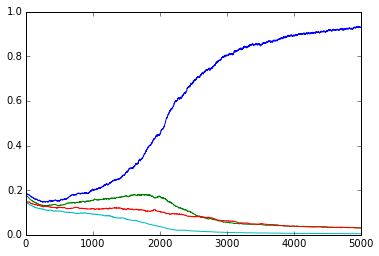

In [8]:
plt.plot(P_trace)
plt.show()

##Example 3: Garden Path

In [9]:
# Harmony difference
hdiff = 0.5    # S1 is preferred to S2.
#hdiff = 0.     # S1 and S2 are equally preferred.

In [10]:
# Grammar 3 (Garden path)
role_names3 = ['R[0,1,2]', 'R[0,1]', 'R[1,2]']
filler_names3 = ['S[1]', 'S[2]', 'A', 'B', 'C']
sentence_types3 = [['S[1]/R[0,1,2]', 'A/R[0,1]', 'B/R[1,2]'], 
                   ['S[2]/R[0,1,2]', 'A/R[0,1]', 'C/R[1,2]']]

net3 = GscNet(filler_names=filler_names3, role_names=role_names3, reptype_f='dist', reptype_r='dist',
             T_init=0.01, T_decay_rate=0, q_init=0, q_max=200, q_rate=0.01, q_fun='plinear', 
             beta=10, grid_points=sentence_types3)

net3.set_weight('S[1]/R[0,1,2]', ['A/R[0,1]', 'B/R[1,2]'], 2.0)
net3.set_weight('S[2]/R[0,1,2]', ['A/R[0,1]', 'C/R[1,2]'], 2.0)
net3.set_filler_bias('S[2]', -2.0)
net3.set_filler_bias('S[1]', -2.0 + hdiff)
net3.set_filler_bias(['A', 'B', 'C'], -1.0)
net3.check_beta(disp=True)

Recommended beta min = 4.928


In [11]:
params3 = {'testvar': 'ema_speed',
           'norm_ord': np.inf,
           'convergence_check': True,
           'dist_space': 'S',
           'tol': 1e-3,
           'ema_factor': 0.1, 
           'grid_points': sentence_types3, 
           'input_method': 'ext',
           'cumulative_input': False,
           'input_inhib': False,
           'update_T': True, 
           'update_q': True, 
           'maxstep': np.array([2000, 3000]), 
           'nrep': 1,
           'q_fun': 'plinear', 
           'ext_overlap': True,
           'ext_overlap_steps': 500}

net3.reset()
net3.T_init = 0.005
net3.T_decay_rate = 0.0
net3.q_rate = 0.04
#net3.q_rate = 0.01        # To avoid parsing failure, q_rate should be set to a small number.

input_list = ['A/R[0,1]', 'C/R[1,2]']
net3.reset()
sim3 = sim(net3, params3)
input_vals = [1.0, 1.0]       # implement as the weighted average of external input
sim3.input_list = input_list
sim3.input_vals = input_vals

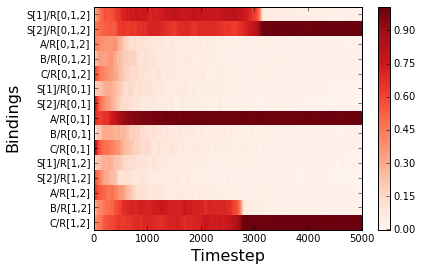

      R[0,1,2]    R[0,1]    R[1,2]
S[1]  0.766261  0.039014  0.043890
S[2]  0.683266  0.041443  0.033571
A     0.055800  0.989534  0.050274
B     0.049275  0.067513  0.707973
C     0.052004  0.056459  0.734532
['S[1]/R[0,1,2]', 'A/R[0,1]', 'C/R[1,2]']
      R[0,1,2]    R[0,1]    R[1,2]
S[1]  0.032740  0.013211  0.013763
S[2]  0.991915  0.012883  0.005620
A     0.020981  0.992261  0.019592
B     0.012590  0.020289  0.015859
C     0.023807  0.009301  0.993357
['S[2]/R[0,1,2]', 'A/R[0,1]', 'C/R[1,2]']


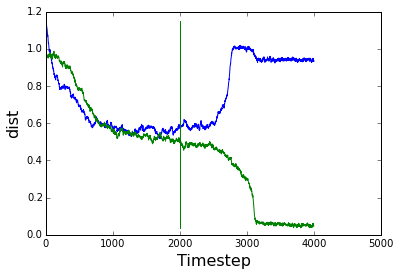

In [12]:
sim3.simulate()
rep_num = 1
sim3.plot_act_trace(rep_num)
sim3.read_state(rep_num, 1)
sim3.read_grid_point(rep_num, 1)
sim3.read_state(rep_num, 2)
sim3.read_grid_point(rep_num, 2)
sim3.rt
sim3.plot_trace('dist', rep_num)

##Example 4: Local Coherence